In [13]:
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import phik
from phik import resources, report
warnings.simplefilter(action='ignore')
from sklearn import preprocessing

In [14]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

le = preprocessing.LabelEncoder()

df_train["Loan_Status"]=le.fit_transform(df_train.Loan_Status)
df_sample=pd.read_csv("sample_submission.csv")
#combined=pd.concat([df_train,df_test])


In [15]:
combined=pd.concat([df_train,df_test])
combined['Dependents'].loc[combined['Dependents'] == '3+'] = 3
combined['ApplicantIncome'].loc[combined['ApplicantIncome'] == 0] = np.nan



In [16]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights="uniform")

cols=["Gender","Loan_Amount_Term","Married","Self_Employed","Dependents"]
column=["Annual_Income"]
combined[cols]=combined[cols].fillna(combined.mode().iloc[0])
combined[column]=combined[column].fillna(combined.mean().iloc[0])

combined[["CoapplicantIncome","ApplicantIncome","LoanAmount"]]=imputer.fit_transform(combined[["CoapplicantIncome","ApplicantIncome","LoanAmount"]])

combined.Dependents=combined.Dependents.astype(int)

KeyError: "None of [Index(['Annual_Income'], dtype='object')] are in the [columns]"

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
combined[["LoanAmount","ApplicantIncome","Loan_Amount_Term"]] = scaler.fit_transform(combined[["LoanAmount","ApplicantIncome","Loan_Amount_Term"]])


## Finalizing dataset

In [7]:
combined = pd.get_dummies(combined,columns=["Education","Gender","Married","Property_Area"])

In [332]:
combined.drop(["CoapplicantIncome","Gender_Female","Self_Employed","Married_No","Property_Area_Urban","Education_Graduate","Property_Area_Semiurban"],axis=1,inplace=True)

In [333]:
combined.columns

Index(['Loan_ID', 'Dependents', 'ApplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Education_Not Graduate', 'Gender_Male', 'Married_Yes',
       'Property_Area_Rural'],
      dtype='object')

In [334]:
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler
imp_mean=IterativeImputer()
combined[["Loan_Amount_Term","Credit_History","Loan_Status","Gender_Male"]] = imputer.fit_transform(combined[["Loan_Amount_Term","Credit_History","Loan_Status","Gender_Male"]])


In [335]:
# from sklearn.impute import IterativeImputer
# imp_mean = IterativeImputer(random_state=0)

# combined[["LoanAmount","ApplicantIncome","Credit_History","Loan_Status"]] = imputer.fit_transform(combined[["LoanAmount","ApplicantIncome","Credit_History","Loan_Status"]])


In [336]:
# combined[["Gender_Male","Married_Yes","Dependents","Credit_History"]]=combined[["Gender_Male","Married_Yes","Dependents","Credit_History"]].astype(int)

In [337]:
df_train=combined.iloc[:614,]
df_test=combined.iloc[614:,]

In [338]:
df_train.dtypes

Loan_ID                    object
Dependents                  int64
ApplicantIncome           float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Loan_Status               float64
Education_Not Graduate      uint8
Gender_Male               float64
Married_Yes                 uint8
Property_Area_Rural         uint8
dtype: object

In [339]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

df_train["Loan_Status"]=le.fit_transform(df_train.Loan_Status)
df_train.drop(['Loan_ID'],axis=1,inplace=True)

In [340]:
X=df_train.drop(["Loan_Status"],axis=1)
y=df_train["Loan_Status"].astype(int)

In [341]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [342]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score


In [343]:
 
rf = XGBClassifier()
rf.fit(X_train,Y_train)
#print("Dropping column")
predictions = rf.predict(X_test)
print("F1 score " + f1_score(Y_test, predictions).astype(str))
score=round(rf.score(X_test, Y_test) * 100, 2)
print("Accuracy Score = "+score.astype(str))

F1 score 0.8436018957345972
Accuracy Score = 78.57


In [355]:
 
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
#rint("Dropping column")
predictions = rf.predict(X_test)
print("F1 score " + f1_score(Y_test, predictions).astype(str))
score=round(rf.score(X_test, Y_test) * 100, 2)
print("Accuracy Score = "+score.astype(str))

F1 score 0.8663594470046083
Accuracy Score = 81.17


# Hyperparameter Optimization

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [357]:
from sklearn.model_selection import GridSearchCV


In [402]:
params={
    'max_features' : ['auto'],
    'n_estimators' :[i for i in range(70,200,10)],
    'max_depth' : [i for i in range(3,12,1)],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'bootstrap' : [True, False]

    
       }

In [428]:
params={'bootstrap': False,
  'max_depth': 7,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 110}

In [429]:
rf = RandomForestClassifier(random_state=0) 
clf = GridSearchCV(rf,params,
                    cv=3,
                    verbose=1, 
                    scoring='accuracy',
                    n_jobs=4
                  )

clf.fit(X,y)
clf.best_score_, clf.best_params_

ValueError: Parameter values for parameter (bootstrap) need to be a sequence(but not a string) or np.ndarray.

In [407]:
params={'bootstrap': False,
  'max_depth': 7,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 110} 

In [345]:
# X_test["Predictions"]=rf.predict(X_test)
# X_test["Actual"]=Y_test

In [346]:
# X_test[X_test["Predictions"]!=X_test["Actual"]]

# Drop columns

In [347]:
rf.feature_importances_

array([0.04541574, 0.25016598, 0.22077906, 0.0566101 , 0.32665452,
       0.02241066, 0.02121361, 0.02620722, 0.03054311])

In [348]:
features=X_test.columns

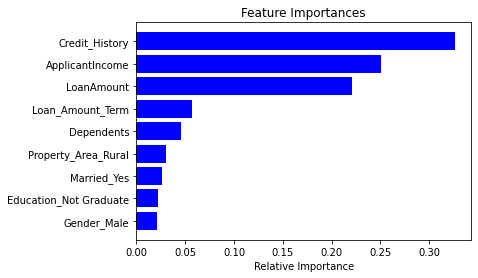

In [349]:
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [202]:
for i in X_train.columns:
    Xx_train=X_train.drop(i,axis=1)
    Xx_test=X_test.drop(i,axis=1)
    rf = XGBClassifier()
    rf.fit(Xx_train,Y_train)
    print("Dropping column" + i)
    predictions = rf.predict(Xx_test)
    print("F1 score " + f1_score(Y_test, predictions).astype(str))
    score=round(rf.score(Xx_test, Y_test) * 100, 2)
    print("Accuracy Score = "+score.astype(str))


Dropping columnGender
F1 score 0.863849765258216
Accuracy Score = 81.17
Dropping columnMarried
F1 score 0.8532110091743119
Accuracy Score = 79.22
Dropping columnDependents
F1 score 0.8623853211009174
Accuracy Score = 80.52
Dropping columnSelf_Employed
F1 score 0.8663594470046083
Accuracy Score = 81.17
Dropping columnApplicantIncome
F1 score 0.8465116279069768
Accuracy Score = 78.57
Dropping columnCoapplicantIncome
F1 score 0.8611111111111112
Accuracy Score = 80.52
Dropping columnLoanAmount
F1 score 0.8380952380952381
Accuracy Score = 77.92
Dropping columnLoan_Amount_Term
F1 score 0.8504672897196263
Accuracy Score = 79.22
Dropping columnCredit_History
F1 score 0.7623318385650224
Accuracy Score = 65.58
Dropping columnEducation_Not Graduate
F1 score 0.851851851851852
Accuracy Score = 79.22
Dropping columnProperty_Area_Rural
F1 score 0.8530805687203792
Accuracy Score = 79.87


In [487]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=20,
                          learning_rate=0.1,
                          depth=6)
model.fit(X_train,Y_train)
print("F1 score " + f1_score(Y_test, predictions).astype(str))
score=round(model.score(X_test, Y_test) * 100, 2)
print("Accuracy Score = "+score.astype(str))


AttributeError: module 'pandas' has no attribute 'SparseDtype'

## Submission

In [430]:

rf = RandomForestClassifier
rf.fit(X,y)
df_test["Loan_Status"]=rf.predict(df_test.drop(["Loan_ID","Loan_Status"],axis=1))
submission=df_test[["Loan_ID","Loan_Status"]]
#combined['Dependents'].loc[combined['Dependents'] == '3+'] = 3

submission['Loan_Status'].loc[submission["Loan_Status"]==1]='Y'
submission['Loan_Status'].loc[submission["Loan_Status"]==0]='N'
submission.to_csv("submission1.csv",index=False)
